## Hands-On Material 1
`Dataset` : https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

### Load and Describe the Data
We'll start by importing the pandas library, loading the penguins dataset from a CSV file, and then using the `.describe()` method to get a statistical summary of the numerical columns in the dataset.

In [41]:
import pandas as pd
penguins = pd.read_csv("Datasets/penguins_size.csv")
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Data Cleaning
Here, we remove any rows that contain missing values (NaN) to ensure our dataset is clean before we proceed with model training.

In [42]:
penguins = penguins.dropna()

### Define Target Names
We create a list of the target class names, which correspond to the different species of penguins in our dataset.

In [43]:
target_names = ["Adelie", "Chinstrap", "Gentoo"]

### Separate Features and Target
We define our feature names and then create our feature matrix `X` and target vector `y` from the `penguins` DataFrame.

In [44]:
feature_names = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguins[feature_names]
y = penguins["species"]

### Create Dataset Dictionary
To keep our data organized and in a format similar to what scikit-learn's built-in datasets use, we'll create a dictionary to hold our features, target, and metadata.

In [45]:
penguins_dataset = {
    'data': X,              
    'target': y,            
    'feature_names': feature_names,
    'target_names': target_names,
    'frame': penguins       
}

### Inspect the Feature Data
Let's look at the shape of our feature data.

In [46]:
print("Shape of data: {}".format(penguins_dataset['data'].shape))


Shape of data: (334, 4)


Now, let's check the type of the feature data.

In [47]:
print("type of data: {}".format(type(penguins_dataset['data'])))

type of data: <class 'pandas.core.frame.DataFrame'>


And here are the first five rows of the feature data.

In [48]:
print("first five col of data: \n{}".format(penguins_dataset['data'][:5]))

first five col of data: 
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0


### Inspect the Target Data
Checking the type of our target data.

In [49]:
print("type of target:{}".format(type(penguins_dataset['target'])))

type of target:<class 'pandas.core.series.Series'>


Checking the shape of the target data.

In [50]:
print("shape of target: {}".format(penguins_dataset['target'].shape))

shape of target: (334,)


Checking the contents of the target data.

In [51]:
print("target:\n{}".format(penguins_dataset['target']))

target:
0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object


### Split Data into Training and Testing Sets
We use scikit-learn's `train_test_split` function to split our data into training and testing sets. This allows us to train our model on one subset of the data and test its performance on another, unseen subset.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(penguins_dataset['data'], penguins_dataset['target'], random_state=0)

d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Verify the Split
Let's print the shapes of our new training and testing sets to confirm they were split correctly.

In [53]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (250, 4)
X_test shape: (84, 4)
y_train shape: (250,)
y_test shape: (84,)


### Encode Target Labels
Since machine learning models work with numbers, we need to convert our categorical string labels (the species names) into numerical form. We use `LabelEncoder` for this, which assigns a unique integer to each class label.

In [54]:
from sklearn.preprocessing import LabelEncoder

if y_train.dtype == 'O' or isinstance(y_train.iloc[0], str):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    target_names = le.classes_
else:
    y_train_encoded = y_train
    target_names = ["Adelie", "Chinstrap", "Gentoo"]

le = LabelEncoder()
y_encoded = le.fit_transform(penguins["species"])

### Visualize the Data
A scatter matrix is a great way to visualize the relationships between different features and how they separate the target classes. This helps us see which pairs of features might be good for classification.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10740\870539206.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


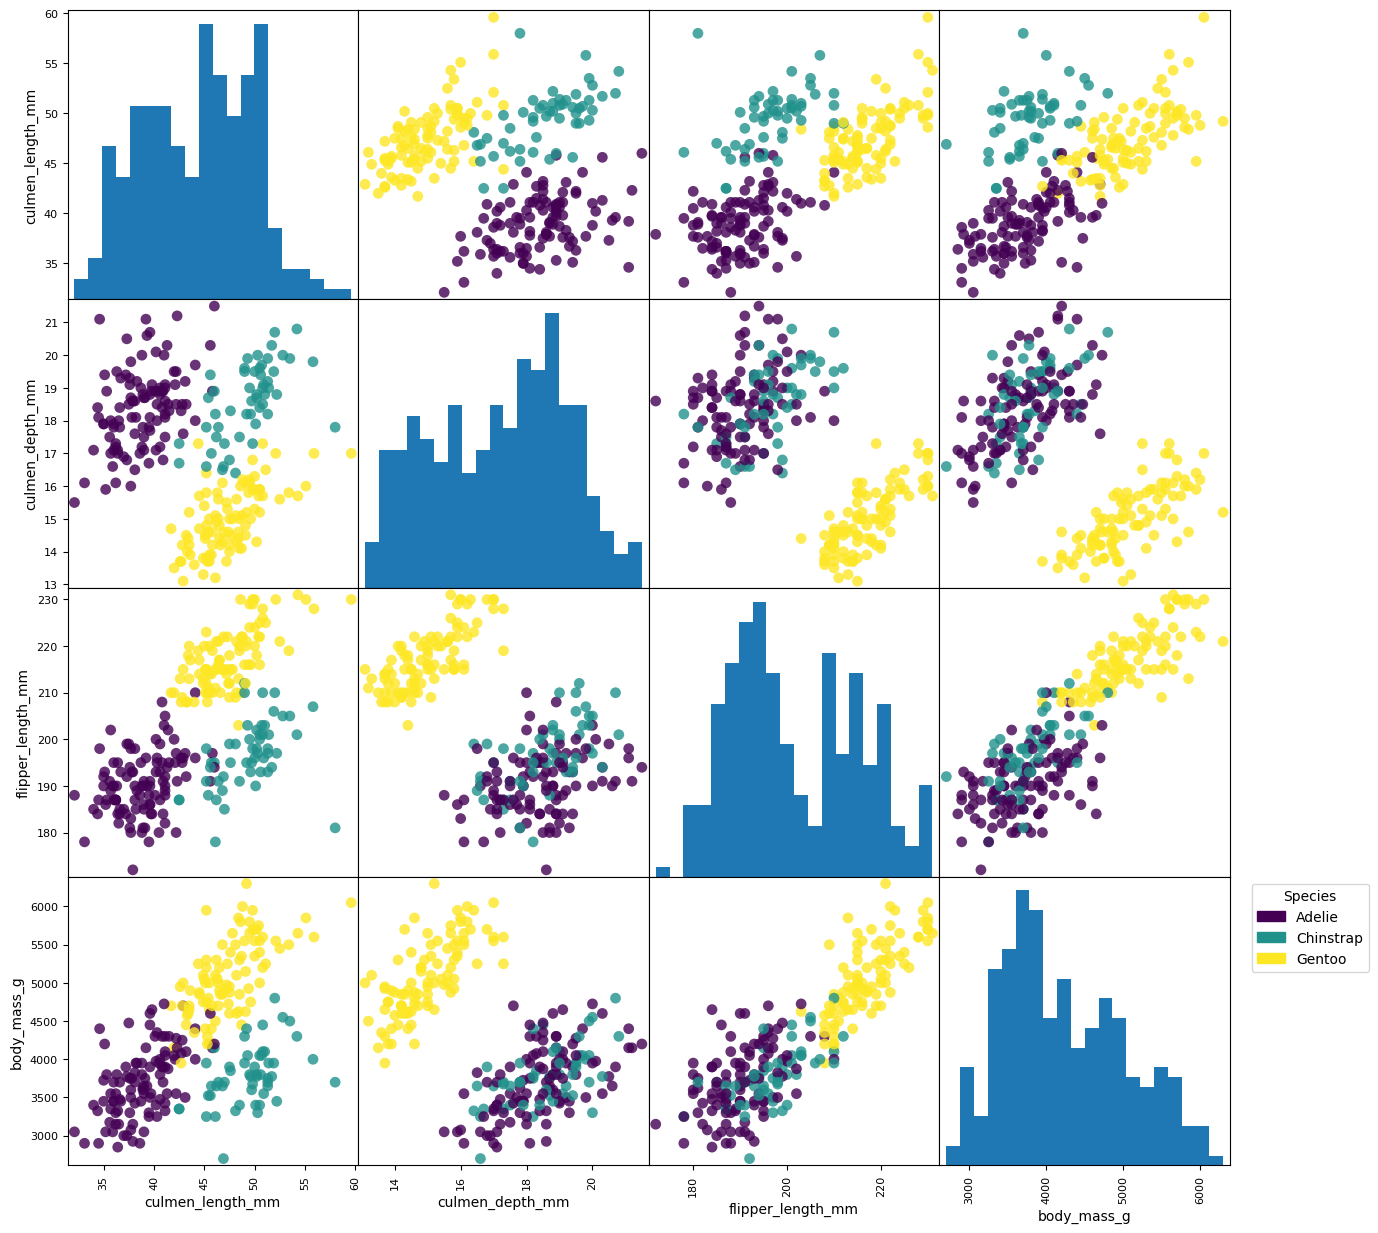

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

penguin_df = pd.DataFrame(X_train, columns=feature_names)
grr = pd.plotting.scatter_matrix(
    penguin_df,
    c=y_train_encoded,
    figsize=(15, 15),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=.8,
    cmap='viridis'
)

cmap = plt.cm.get_cmap('viridis')
patches = [
    mpatches.Patch(color=cmap(i / (len(target_names) - 1)), label=target_name)
    for i, target_name in enumerate(target_names)
]
plt.legend(handles=patches, title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Create and Train the k-NN Classifier
Now we'll create an instance of the `KNeighborsClassifier`. We're starting with `n_neighbors=1`, which means each prediction will be based on the single closest data point in the training set.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

We train (or "fit") the k-NN model using our training data (`X_train` and `y_train`).

In [57]:
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Make a Prediction on New Data
To see how our trained model works, we can create a new, imaginary data point (`X_new`) and ask the model to predict its species.

In [58]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Here's the model's prediction for our new data point.

In [59]:
prediction = knn.predict(X_new)
print("Predicted species:", prediction[0])


Predicted species: Chinstrap


d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Evaluate the Model
Now, let's use our test set (`X_test`) to make predictions and see how well our model performs on data it has never seen before.

In [60]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap']


Finally, we calculate the accuracy score of our model on the test set. This tells us the proportion of correct predictions.

In [61]:
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

test set score: 0.87
